# Modelo de Reconocimiento de Texto en Escenas (STR)

## Instalacion de dependencias

In [1]:
# Instalamos las dependencias
%pip install -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Borramos la ruta de data

De esta forma aseguramos que no haya datos que puedan alterar el flujo del script

In [2]:
from pathlib import Path
import shutil
import os

project_root = Path.cwd().parent 

ruta_data =  project_root / "data" / "STR"

# Verificar si la carpeta existe antes de eliminarla
def delete_paths(path)->None:
  if os.path.exists(path):
      shutil.rmtree(path)  # Elimina la carpeta y todo su contenido
      print(f"✅ Se ha eliminado: {path}")
  else:
      print(f"❌ La carpeta no existe con el path {path}, no hay nada que borrar.")

# Eliminamos las rutas del modelo y de la data
delete_paths(ruta_data)

✅ Se ha eliminado: c:\Users\alfni\OneDrive\Desktop\IA\Proyecto_2\data\STR


## 1. Obtención y Exploración de Datos (IIIT-5K Dataset):
- Descarguen el dataset de Kaggle.
- Investiguen su estructura. Notarán que las etiquetas (el texto de cada imagen) a menudo se encuentran en archivos .mat (formato de MATLAB). Pero tambien esta en formato CSV, pueden ignorar los .mat
- Escriban los scripts para asociar correctamente cada archivo de imagen con su palabra o texto correspondiente. (Tip, el path es una columan en el CSV)

1. Descargamos el dataset de Kaggle y lo guardamos en el directorio *data*

In [3]:
import shutil
from pathlib import Path
import kagglehub

# 1) Descarga o reutiliza la ruta
downloaded = kagglehub.dataset_download("prathmeshzade/iiit5k-words")
src = Path(downloaded)

# 2) Definimos destino = carpeta padre del cwd
project_root = Path.cwd().parent           # ← aquí la carpeta “padre”
dst = project_root / "data"   / "STR"             # opcional: lo metemos en un subfolder “data”
dst.mkdir(parents=True, exist_ok=True)

# 3) Copiamos CSVs y subcarpetas de src → dst
for item in src.iterdir():
    target = dst / item.name
    if item.is_dir():
        shutil.copytree(item, target, dirs_exist_ok=True)
    elif item.suffix.lower() == ".csv":
        shutil.copy2(item, target)

print("Contenido copiado a:", dst.resolve())


c:\Users\alfni\OneDrive\Desktop\IA\Proyecto_2\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Contenido copiado a: C:\Users\alfni\OneDrive\Desktop\IA\Proyecto_2\data\STR


## 2. Preprocesamiento de las Imágenes:
- Diseñen un pipeline de preprocesamiento. A diferencia del texto manuscrito limpio, las imágenes de escenas pueden tener colores, fondos ruidosos y diferentes tipos de letra. Consideren pasos como: cambio de tamaño, normalización de píxeles, y quizás técnicas de aumento de datos (data augmentation) más avanzadas.

In [4]:
from pathlib import Path
import pandas as pd

try:
    project_root = Path.cwd().parent 
    file_path = project_root / "data" / "STR" / "testCharBound.csv"  
    df = pd.read_csv(file_path)
    print(df.head())

    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)

    # Print the contents of the DataFrame (e.g., the first few rows)
    print(df.head())
    print(f"columnas: {df.columns}")
    print(f"filas: {len(df)}")


except FileNotFoundError:
    print(f"Error: The file {file_path} was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

           ImgName    chars                                             charBB
0  test/1002_1.png  PRIVATE  [[  4.   7.  32.  45.]\n [ 34.   8.  32.  44.]...
1  test/1002_2.png  PARKING  [[  3.   3.  31.  44.]\n [ 28.   3.  39.  41.]...
2  test/1009_1.png  Salutes  [[  4.   3.  21.  33.]\n [ 28.  12.  18.  23.]...
3   test/100_1.png    DOLCE  [[ 7.  9. 25. 33.]\n [33.  6. 31. 37.]\n [64. ...
4   test/100_2.png  GABBANA  [[  6.   6.  31.  36.]\n [ 36.   7.  23.  35.]...
           ImgName    chars                                             charBB
0  test/1002_1.png  PRIVATE  [[  4.   7.  32.  45.]\n [ 34.   8.  32.  44.]...
1  test/1002_2.png  PARKING  [[  3.   3.  31.  44.]\n [ 28.   3.  39.  41.]...
2  test/1009_1.png  Salutes  [[  4.   3.  21.  33.]\n [ 28.  12.  18.  23.]...
3   test/100_1.png    DOLCE  [[ 7.  9. 25. 33.]\n [33.  6. 31. 37.]\n [64. ...
4   test/100_2.png  GABBANA  [[  6.   6.  31.  36.]\n [ 36.   7.  23.  35.]...
columnas: Index(['ImgName', 'chars', 'charBB'], dtyp

### Visualizamos la data de las imagenes

Displaying image: c:\Users\alfni\OneDrive\Desktop\IA\Proyecto_2\data\STR\IIIT5K-Word_V3.0\IIIT5K\test/1002_1.png


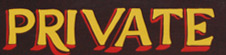

Displaying image: c:\Users\alfni\OneDrive\Desktop\IA\Proyecto_2\data\STR\IIIT5K-Word_V3.0\IIIT5K\test/1002_2.png


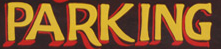

Displaying image: c:\Users\alfni\OneDrive\Desktop\IA\Proyecto_2\data\STR\IIIT5K-Word_V3.0\IIIT5K\test/1009_1.png


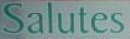

Displaying image: c:\Users\alfni\OneDrive\Desktop\IA\Proyecto_2\data\STR\IIIT5K-Word_V3.0\IIIT5K\test/100_1.png


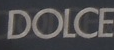

Displaying image: c:\Users\alfni\OneDrive\Desktop\IA\Proyecto_2\data\STR\IIIT5K-Word_V3.0\IIIT5K\test/100_2.png


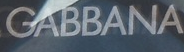

Displaying image: c:\Users\alfni\OneDrive\Desktop\IA\Proyecto_2\data\STR\IIIT5K-Word_V3.0\IIIT5K\test/100_3.png


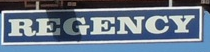

Displaying image: c:\Users\alfni\OneDrive\Desktop\IA\Proyecto_2\data\STR\IIIT5K-Word_V3.0\IIIT5K\test/1016_1.png


Displaying image: c:\Users\alfni\OneDrive\Desktop\IA\Proyecto_2\data\STR\IIIT5K-Word_V3.0\IIIT5K\test/1016_2.png


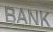

Displaying image: c:\Users\alfni\OneDrive\Desktop\IA\Proyecto_2\data\STR\IIIT5K-Word_V3.0\IIIT5K\test/1016_3.png


Displaying image: c:\Users\alfni\OneDrive\Desktop\IA\Proyecto_2\data\STR\IIIT5K-Word_V3.0\IIIT5K\test/1016_4.png


In [5]:
from IPython.display import display, Image
import os

project_root = Path.cwd().parent 
image_dir = project_root / "data" / "STR" / "IIIT5K-Word_V3.0/IIIT5K/" 

if df is not None and not df.empty:
  # Iterate through the first few image names in the DataFrame
  for img_name in df['ImgName'].head(10): # Using .head() to display only the first few
    image_path = os.path.join(image_dir, img_name)
    if os.path.exists(image_path):
      print(f"Displaying image: {image_path}")
      display(Image(filename=image_path))
    else:
      print(f"Image not found: {image_path}")
else:
  print("DataFrame is not loaded or is empty. Cannot display images.")

## Transformación de datos para manejo de imágenes

### Carga y conversión a RGB

La función `load_image()` utiliza `cv2.imread` para leer la imagen y luego convierte de BGR a RGB para asegurar la consistencia de canales.

### Cambio de tamaño manteniendo proporción

La función `resize_with_aspect()` realiza:

- Ajuste de la altura a 32 px y escala proporcional de la anchura.  
- Padding con color negro si la anchura resultante es menor que 128 px.  
- Recorte de excedentes si supera los 128 px de ancho.

### Normalización de píxeles

La función `normalize_and_to_tensor()` lleva a cabo:

- Escalado de valores de píxeles a [0, 1].  
- Sustracción de la media `[0.485, 0.456, 0.406]` y división por la desviación estándar `[0.229, 0.224, 0.225]`.  
- Reordenamiento de H×W×C a C×H×W para obtener un `torch.Tensor`.

### Técnicas de data augmentation

El pipeline de augmentations definido con Albumentations incluye:

- `Perspective` para distorsión leve.  
- `RandomBrightnessContrast` para variaciones aleatorias de brillo y contraste.  
- `MotionBlur` para simular desenfoque de movimiento.  
- `GaussNoise` para añadir ruido gaussiano.

### Conversión inversa y guardado

La función `tensor_to_bgr_image()`:

- Desnormaliza el tensor y lo convierte de RGB a BGR.  
- Guarda la imagen resultante con `cv2.imwrite`.

En `process_and_save_all()`, se itera sobre los nombres de imagen del DataFrame, se aplica el preprocesamiento aumentado y se almacenan los archivos resultantes en disco.  

In [6]:
import os
from typing import Optional, Dict
import cv2
import numpy as np
import torch
import albumentations as A
from tqdm import tqdm
# TODO: Mejorar el procesamiento de las imagenes
# --- 1) Igual que antes: load, resize, normalize → tensor ---

def load_image(path: str) -> np.ndarray:
    img_bgr = cv2.imread(path, cv2.IMREAD_COLOR)
    if img_bgr is None:
        raise FileNotFoundError(f"No se pudo leer {path!r}")
    return cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

def resize_with_aspect(img: np.ndarray,
                       target_height: int = 32,
                       max_width: int = 128) -> np.ndarray:
    h, w, _ = img.shape
    new_w = int(w * (target_height / h))
    img_resized = cv2.resize(img, (new_w, target_height),
                             interpolation=cv2.INTER_LINEAR)
    if new_w < max_width:
        pad = max_width - new_w
        img_resized = cv2.copyMakeBorder(
            img_resized, 0, 0, 0, pad,
            borderType=cv2.BORDER_CONSTANT,
            value=[0, 0, 0]
        )
    else:
        img_resized = img_resized[:, :max_width]
    return img_resized

def normalize_and_to_tensor(img: np.ndarray) -> torch.Tensor:
    img_f = img.astype(np.float32) / 255.0
    mean = np.array([0.485, 0.456, 0.406])
    std  = np.array([0.229, 0.224, 0.225])
    img_norm = (img_f - mean[None,None,:]) / std[None,None,:]
    return torch.from_numpy(img_norm).permute(2, 0, 1)

# --- 2) Augmentations idéntico ---
augment_pipeline = A.Compose([
    A.Perspective(distortion_scale=0.1, p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.2,
                               contrast_limit=0.2, p=0.5),
    A.MotionBlur(blur_limit=3, p=0.3),
    A.GaussNoise(var_limit=(10.0, 50.0), p=0.3),
])

# --- 3) Funciones de preprocessing ---
def apply_basic_preprocessing(path: str) -> torch.Tensor:
    img = load_image(path)
    img = resize_with_aspect(img)
    return normalize_and_to_tensor(img)

def apply_augmented_preprocessing(path: str) -> torch.Tensor:
    img = load_image(path)
    img = augment_pipeline(image=img)["image"]
    img = resize_with_aspect(img)
    return normalize_and_to_tensor(img)

# --- 4) Helper: tensor → imagen BGR para guardar ---
def tensor_to_bgr_image(tensor: torch.Tensor) -> np.ndarray:
    # C×H×W → H×W×C
    img = tensor.permute(1,2,0).cpu().numpy()
    # des-normalizar
    mean = np.array([0.485, 0.456, 0.406])
    std  = np.array([0.229, 0.224, 0.225])
    img = (img * std[None,None,:] + mean[None,None,:]) * 255
    img = np.clip(img, 0, 255).astype(np.uint8)
    # RGB → BGR para cv2
    return cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

# --- 5) Process + save ---
def process_and_save_all(df, image_dir: str):
    results_basic: Dict[str, Optional[torch.Tensor]] = {}
    results_aug:   Dict[str, Optional[torch.Tensor]] = {}

    for img_name in tqdm(df["ImgName"], desc="Procesando"):
        img_path = os.path.join(image_dir, img_name)
        name, ext = os.path.splitext(img_name)

        # Básico
        """
        try:
            tb = apply_basic_preprocessing(img_path)
            results_basic[img_name] = tb

            bgr = tensor_to_bgr_image(tb)
            out_path = os.path.join(image_dir, f"{name}_basic{ext}")
            cv2.imwrite(out_path, bgr)
        except Exception as e:
            results_basic[img_name] = None
            print(f"[{img_name}] error básico: {e}")
        """
        # Aumentado
        try:
            ta = apply_augmented_preprocessing(img_path)
            results_aug[img_name] = ta

            bgr = tensor_to_bgr_image(ta)
            out_path = os.path.join(image_dir, f"{name}{ext}")
            cv2.imwrite(out_path, bgr)
        except Exception as e:
            results_aug[img_name] = None
            print(f"[{img_name}] error aumentado: {e}")

    print("¡Todas las imágenes procesadas y guardadas!")
    return results_basic, results_aug

# --- Uso ---
# if df is not None and not df.empty:
#     basic_dict, aug_dict = process_and_save_all(df, image_dir)
# else:
#     print("DataFrame vacío o no existe.")


C:\Users\alfni\AppData\Local\Temp\ipykernel_30104\2113745658.py:44: UserWarning: Argument(s) 'distortion_scale' are not valid for transform Perspective
  A.Perspective(distortion_scale=0.1, p=0.5),
C:\Users\alfni\AppData\Local\Temp\ipykernel_30104\2113745658.py:48: UserWarning: Argument(s) 'var_limit' are not valid for transform GaussNoise
  A.GaussNoise(var_limit=(10.0, 50.0), p=0.3),


### Visualizamos la data despues de transformarla

Displaying image: c:\Users\alfni\OneDrive\Desktop\IA\Proyecto_2\data\STR\IIIT5K-Word_V3.0\IIIT5K\test/1002_1.png


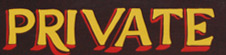

Displaying image: c:\Users\alfni\OneDrive\Desktop\IA\Proyecto_2\data\STR\IIIT5K-Word_V3.0\IIIT5K\test/1002_2.png


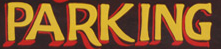

Displaying image: c:\Users\alfni\OneDrive\Desktop\IA\Proyecto_2\data\STR\IIIT5K-Word_V3.0\IIIT5K\test/1009_1.png


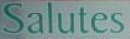

Displaying image: c:\Users\alfni\OneDrive\Desktop\IA\Proyecto_2\data\STR\IIIT5K-Word_V3.0\IIIT5K\test/100_1.png


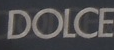

Displaying image: c:\Users\alfni\OneDrive\Desktop\IA\Proyecto_2\data\STR\IIIT5K-Word_V3.0\IIIT5K\test/100_2.png


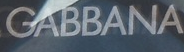

Displaying image: c:\Users\alfni\OneDrive\Desktop\IA\Proyecto_2\data\STR\IIIT5K-Word_V3.0\IIIT5K\test/100_3.png


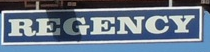

Displaying image: c:\Users\alfni\OneDrive\Desktop\IA\Proyecto_2\data\STR\IIIT5K-Word_V3.0\IIIT5K\test/1016_1.png


Displaying image: c:\Users\alfni\OneDrive\Desktop\IA\Proyecto_2\data\STR\IIIT5K-Word_V3.0\IIIT5K\test/1016_2.png


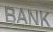

Displaying image: c:\Users\alfni\OneDrive\Desktop\IA\Proyecto_2\data\STR\IIIT5K-Word_V3.0\IIIT5K\test/1016_3.png


Displaying image: c:\Users\alfni\OneDrive\Desktop\IA\Proyecto_2\data\STR\IIIT5K-Word_V3.0\IIIT5K\test/1016_4.png


In [7]:
from IPython.display import display, Image
import os

project_root = Path.cwd().parent 
image_dir = project_root / "data" / "STR" / "IIIT5K-Word_V3.0/IIIT5K/" 

if df is not None and not df.empty:
  # Iterate through the first few image names in the DataFrame
  for img_name in df['ImgName'].head(10): # Using .head() to display only the first few
    image_path = os.path.join(image_dir, img_name)
    if os.path.exists(image_path):
      print(f"Displaying image: {image_path}")
      display(Image(filename=image_path))
    else:
      print(f"Image not found: {image_path}")
else:
  print("DataFrame is not loaded or is empty. Cannot display images.")

## 3. Diseño y Entrenamiento del Modelo STR:
- Investiguen arquitecturas de modelos para STR. La combinación de Redes Convolucionales (CNN) para la extracción de características visuales y Redes Recurrentes (RNN) para interpretar la secuencia de caracteres es el enfoque más común y exitoso.
- Implementen la arquitectura que elijan y la función de pérdida.
- Entrenen el modelo usando los datos de IIIT-5K.

---

## 🔥 Resumen de los Modelos Fallidos

### Modelo Fallido 1  
🔗 https://colab.research.google.com/drive/19TwtSgSjuX4AqTc3R_CS_dctzvmJdzAg?usp=sharing  

- Problemas teóricos en la transformación de las imágenes  
- Planteamiento inadecuado para reconocer caracteres de forma matricial  
- Pérdida de letras al redimensionar y normalizar  

### Modelo Fallido 2  
🔗 https://colab.research.google.com/drive/13RY7NzshbE-jbBCEEYzinwryyYXdxnhL?usp=sharing  

---

## 🚀 Mejoras Implementadas

- **TextEncoder**  
  Convierte texto ↔ índices, reservando `0` como token blank de CTC.

- **SceneTextDataset**  
  Carga `(ruta_imagen, texto)`, aplica transformaciones y genera tensores.

- **CRNN (CNN + BiLSTM + CTC)**  
  1. CNN para extraer características espaciales  
  2. BiLSTM para modelar la secuencia  
  3. LogSoftmax + CTC Loss  

- **ctc_collate_fn**  
  Apila imágenes, concatena etiquetas y calcula longitudes para CTC.

---

## 🏋️ Flujo de Entrenamiento

1. **Preparación de datos**  
   - Leer `traindata.csv`, filtrar rutas existentes  
   - Crear diccionario `ruta → ground truth`  
   - Construir vocabulario y encoder  
   - Definir transformaciones (`Resize`, `ToTensor`, `Normalize`)  
   - `SceneTextDataset` + `DataLoader` (CTC collate)

2. **Definición de modelo**  
   - `CRNN(imgH=32, nc=3, nclass=vocab_size, nh=256)`  
   - Criterio: `CTCLoss(blank=0)`  
   - Optimizer: `Adam(lr=1e-3, wd=1e-5)`  
   - Scheduler: reduce LR cada 5 epochs (γ=0.5)

3. **Training loop**  
   - Forward → logits `(T,B,C)`  
   - Ajustar `input_lengths`  
   - Calcular pérdida, backward, clipping, optimizer.step()  
   - Mostrar loss parcial y promedio por epoch

4. **Guardado**  
   - Serializar `state_dict` + mapeos `char2idx`/`idx2char` en `crnn_model.pth`  

---

## 🧰 Bibliotecas OCR Analizadas

- **PaddleOCR**  
  Modelo end-to-end de Baidu (detección + reconocimiento), multi-idioma 🎯  
  ![PaddleOCR pipeline](https://products.documentprocessing.com/images/paddleocr-pipeline.png)

- **Tesseract**  
  OCR clásico de Google, ideal para documentos escaneados 📄  
  ![Tesseract](https://upload.wikimedia.org/wikipedia/commons/7/78/Tesseract_OCR_logo_%28Google%29.png)

- **EasyOCR**  
  Pre-entrenado en 80+ idiomas, alta precisión en texto de escena, fácil integración 🚀  
  ![EasyOCR logo](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTx7kQCmpJvs1rHt1zDwU37f_A5AZSBZ1IYoA&s)

---

**💡 Conclusión:**  
En lugar de luchar con shapes, CTC y overfitting en un set pequeño, optar por **EasyOCR** o **PaddleOCR** acelera resultados de calidad sin reinventar la rueda o como es en nuestro caso reinventarla esta siendo dificultoso y muchos intentos fallidos. 🏆  


## 4. Evaluación del Modelo STR

Evalúen el rendimiento del modelo en el conjunto de prueba del dataset. Utilicen métricas estándar como la Tasa de Error de Caracteres (CER) y la Tasa de Error de Palabras (WER).

``` python
import jiwer

# Ground truth and hypothesis sentences
ground_truth = "this is a test sentence"
hypothesis = "this a sentenc"

# Calculate Word Error Rate (WER)
wer = jiwer.wer(ground_truth, hypothesis)
print(f"Word Error Rate (WER): {wer}")

# Calculate Character Error Rate (CER)
cer = jiwer.cer(ground_truth, hypothesis)
print(f"Character Error Rate (CER): {cer}")
```

In [8]:
import warnings
warnings.filterwarnings(
    "ignore",
    message=".*pin_memory.*",
    category=UserWarning,
    module="torch.utils.data.dataloader"
)

import os
import torch
from pathlib import Path
import pandas as pd
import easyocr
from jiwer import wer, cer
from tqdm import tqdm

# Detectar GPU
use_gpu = torch.cuda.is_available()
print(f"🔥 GPU disponible: {use_gpu}")

# Rutas
project_root = Path.cwd().parent
base_dir     = project_root / "data" / "STR"
test_csv     = base_dir / "testdata.csv"
images_dir   = base_dir / "IIIT5K-Word_V3.0" / "IIIT5K"

# DataFrame de prueba
df = pd.read_csv(test_csv)
df["ImgPath"] = df["ImgName"].apply(lambda fn: str(images_dir / fn))
df = df[df["ImgPath"].apply(os.path.exists)].reset_index(drop=True)
print(f"✅ {len(df)} imágenes encontradas\n")

# Init EasyOCR
reader = easyocr.Reader(["en"], gpu=use_gpu)

# Inferencia y recolección
records = []
for row in tqdm(df.itertuples(), total=len(df), desc="OCR Inference"):
    gt = row.GroundTruth
    preds = reader.readtext(row.ImgPath, detail=0, paragraph=False)
    pr = " ".join(preds)

    records.append({
        "ImgName": os.path.basename(row.ImgPath),
        "GT":       gt,
        "PR":       pr,
        "WER":      wer(gt, pr),
        "CER":      cer(gt, pr),
        "Exact":    int(gt == pr)
    })

# Convertir a DataFrame
df_res = pd.DataFrame(records)
df_res["WER"] = df_res["WER"].round(3)
df_res["CER"] = df_res["CER"].round(3)

🔥 GPU disponible: False


Using CPU. Note: This module is much faster with a GPU.


✅ 3000 imágenes encontradas



OCR Inference: 100%|██████████| 3000/3000 [11:34<00:00,  4.32it/s] 


### Calculo de metricas del modelo EasyOCR

In [9]:
import warnings
# ─────────────────────────────────────────────────────
# Ignorar warnings de sklearn y DataLoader
warnings.filterwarnings("ignore", category=UserWarning)
# ─────────────────────────────────────────────────────

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report

# Asumiendo que ya tienes df_res con columnas: GT, PR, WER, CER, Exact

# 1) Reporte de clasificación
print("### Classification Report (palabra completa)\n")
print(classification_report(
    df_res["GT"],
    df_res["PR"],
    zero_division=0,
    digits=3
))

# 2) Media y mediana de WER y CER
mean_wer   = df_res["WER"].mean()
median_wer = df_res["WER"].median()
mean_cer   = df_res["CER"].mean()
median_cer = df_res["CER"].median()

summary = pd.DataFrame({
    "Metric": ["WER", "CER"],
    "Mean":   [mean_wer, mean_cer],
    "Median": [median_wer, median_cer]
})




### Classification Report (palabra completa)

                                                                 precision    recall  f1-score   support

                                                                     0.000     0.000     0.000         0
                                                            "50      0.000     0.000     0.000         0
                                                           "BIG      0.000     0.000     0.000         0
                                                         "Going      0.000     0.000     0.000         0
                                                       "Heroes;      0.000     0.000     0.000         0
                                                       "Rikhrys      0.000     0.000     0.000         0
                                                             #2      0.000     0.000     0.000         0
                                                          #ISTq      0.000     0.000     0.000         0
        

In [10]:
print("\n### Resumen de Media y Mediana\n")
print(summary.to_markdown(index=False))


### Resumen de Media y Mediana

| Metric   |     Mean |   Median |
|:---------|---------:|---------:|
| WER      | 0.773333 |    1     |
| CER      | 0.544217 |    0.667 |


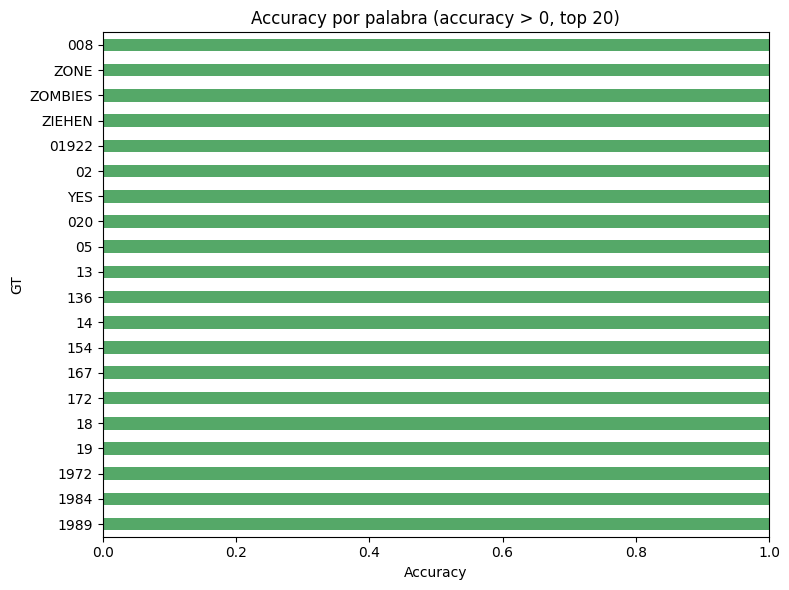

In [11]:
import warnings
# ─────────────────────────────────────────────────────
# Ignorar warnings de sklearn y DataLoader
warnings.filterwarnings("ignore", category=UserWarning)
# ─────────────────────────────────────────────────────
import matplotlib.pyplot as plt

#  Accuracy por clase (barh chart)

# Calcular accuracy por clase (igual que antes)
counts_total   = df_res.groupby("GT").size()
counts_correct = df_res[df_res["GT"] == df_res["PR"]].groupby("GT").size()
acc_per_class  = (counts_correct / counts_total).fillna(0)

# Filtrar solo palabras con accuracy > 0
acc_nonzero = acc_per_class[acc_per_class > 0].sort_values()

# Si son muchas, quedarnos con las 20 últimas (las mejores)
top_acc = acc_nonzero.tail(20)

# Graficar barra horizontal solo de esas
plt.figure(figsize=(8, max(4, len(top_acc)*0.3)))
top_acc.plot.barh(color="#55A868")
plt.xlabel("Accuracy")
plt.title("Accuracy por palabra (accuracy > 0, top 20)")
plt.xlim(0,1)
plt.tight_layout()
plt.show()




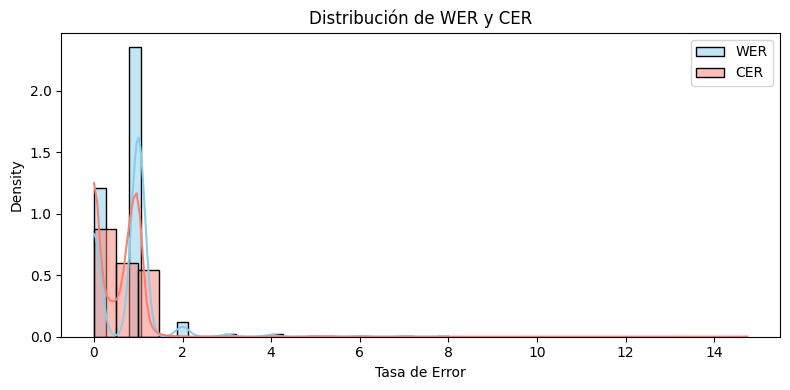

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Histograma con KDE para WER y CER
plt.figure(figsize=(8, 4))
sns.histplot(df_res["WER"], color="skyblue", label="WER", kde=True, stat="density", bins=30)
sns.histplot(df_res["CER"], color="salmon", label="CER", kde=True, stat="density", bins=30)
plt.title("Distribución de WER y CER")
plt.xlabel("Tasa de Error")
plt.legend()
plt.tight_layout()
plt.show()

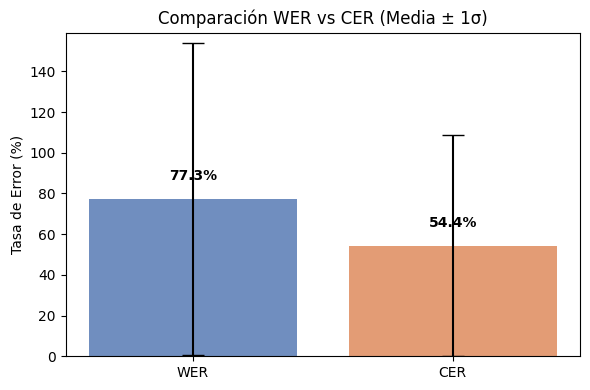

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Convertir a porcentajes
means = df_res[['WER','CER']].mean() * 100
stds  = df_res[['WER','CER']].std()  * 100

metrics = means.index.tolist()
values  = means.values.tolist()
errors  = stds.values.tolist()

# Gráfico de barras con barras de error
fig, ax = plt.subplots(figsize=(6,4))
bars = ax.bar(
    metrics, values,
    yerr=errors, capsize=8,
    color=['#4C72B0','#DD8452'], alpha=0.8
)

# Anotar valores encima de cada barra
for bar, val in zip(bars, values):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        val + max(errors)*0.1,
        f"{val:.1f}%",
        ha='center', va='bottom', fontweight='bold'
    )

# Formatear ejes
ax.set_ylim(0, max(values) + max(errors) + 5)
ax.set_ylabel("Tasa de Error (%)")
ax.set_title("Comparación WER vs CER (Media ± 1σ)")
plt.tight_layout()
plt.show()

